In [19]:
import gymnasium as gym
from gymnasium.wrappers import TransformObservation
import numpy as np
np.random.seed(0)
env = gym.make("CartPole-v1")
print(env.reset(seed=42))


(array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32), {})


In [20]:
env = TransformObservation(env, lambda obs: obs + 0.1 * np.random.randn(*obs.shape))
env.reset(seed=42)

(array([0.20380084, 0.03390356, 0.13373359, 0.24382612]), {})

In [21]:
0.1 * np.random.randn(*[4])

array([ 0.1867558 , -0.09772779,  0.09500884, -0.01513572])

ema_rewards [0.09999999999999998, 0.3899999999999999, -1.6489999999999996, -0.4841, 9.564309999999999, 3.6078789999999996, 4.4470911, 5.30238199]
ema_squared_rewards [0.09999999999999998, 0.9899999999999998, 40.89099999999999, 46.801899999999996, 1042.1217099999997, 1187.9095389999998, 1083.5185850999999, 992.0667265899999]


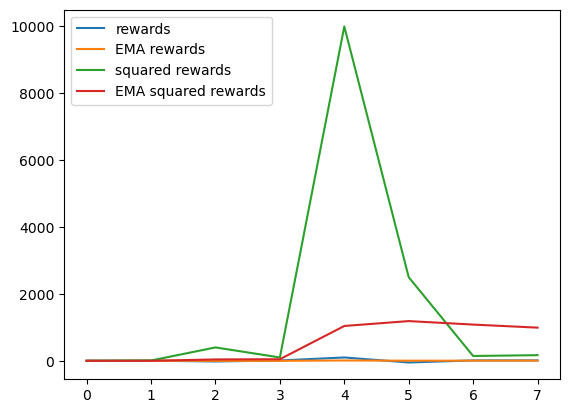

In [2]:
def calculate_ema(data, gamma):
    ema = 0
    emas = []
    for x in data:
        ema = gamma * ema + (1 - gamma) * x
        emas.append(ema)
    return ema, emas

rewards = [1, 3, -20, 10, 100, -50, 12, 13]  # list of rewards
gamma = 0.9  # decay factor

# Calculate EMA of rewards
_, ema_rewards = calculate_ema(rewards, gamma)
print('ema_rewards', ema_rewards)

# Calculate EMA of squared rewards
squared_rewards = [r**2 for r in rewards]
_, ema_squared_rewards = calculate_ema(squared_rewards, gamma)
print('ema_squared_rewards', ema_squared_rewards)

#plot
import matplotlib.pyplot as plt
plt.plot(rewards, label="rewards")
plt.plot(ema_rewards, label="EMA rewards")
plt.plot(squared_rewards, label="squared rewards")
plt.plot(ema_squared_rewards, label="EMA squared rewards")
plt.legend()
plt.show()